In [18]:
import numpy as np
import pandas as pd

# opening california house prices dataset

dataPath = "chp/chp.csv"

chp = pd.read_csv(dataPath)

# print(len(chp.index))

print("Read file to dataframe successfully")

# dropping rows which contain NaN
chp = chp.dropna(axis=0)

# print(len(chp.index))

# dropping columns that are not necessary
# longitude, latitude, ocean_proximity

chp = chp.drop(labels=["longitude", "latitude", "ocean_proximity"], axis=1)

chp.head(10)

Read file to dataframe successfully


,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,41,880,129.0,322,126,8.3252,452600
1,21,7099,1106.0,2401,1138,8.3014,358500
2,52,1467,190.0,496,177,7.2574,352100
3,52,1274,235.0,558,219,5.6431,341300
4,52,1627,280.0,565,259,3.8462,342200
5,52,919,213.0,413,193,4.0368,269700
6,52,2535,489.0,1094,514,3.6591,299200
7,52,3104,687.0,1157,647,3.1200,241400
8,42,2555,665.0,1206,595,2.0804,226700
9,52,3549,707.0,1551,714,3.6912,261100


In [19]:
from sklearn import preprocessing

# standardizing dataset using standard scaler
scaler = preprocessing.StandardScaler().fit(chp)
chp_scaled = scaler.transform(chp)
chp_scaled = pd.DataFrame(chp_scaled, columns=[
    'housing_median_age', 'total_rooms', 'total_bedrooms',
    'population', 'households', 'median_income', 'median_house_value'
])

chp_scaled.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,0.982163,-0.803813,-0.970325,-0.973320,-0.976833,2.345163,2.128819
1,-0.606210,2.042130,1.348276,0.861339,1.670373,2.332632,1.313626
2,1.855769,-0.535189,-0.825561,-0.819769,-0.843427,1.782939,1.258183
3,1.855769,-0.623510,-0.718768,-0.765056,-0.733562,0.932970,1.164622
4,1.855769,-0.461970,-0.611974,-0.758879,-0.628930,-0.013143,1.172418


In [20]:
from sklearn.model_selection import train_test_split

# X is the information
# y is the value to be predicted using X
X = chp_scaled.drop(labels=["median_house_value"], axis=1)
y = chp_scaled[["median_house_value"]].copy()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=10)

In [21]:
from sklearn.linear_model import HuberRegressor, LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


huber = HuberRegressor().fit(X_train, y_train.values.ravel())
print("Score: ", round(huber.score(X_train, y_train), 2))

y_pred = pd.DataFrame(huber.predict(X_test), columns = [
    'Predictions'
])

# Calculating mean absolute error, mean squared error
# and root mean squared error
mae = round(mean_absolute_error(y_test, y_pred), 2)
mse = round(mean_squared_error(y_test, y_pred), 2)
rmse = round(np.sqrt(mse), 2)

print("Mean Absolute Error: ", mae)
print("Mean Squared Error: ", mse)
print("Root Mean Squared Error: ", rmse)

Score:  0.56
Mean Absolute Error:  0.47
Mean Squared Error:  0.44
Root Mean Squared Error:  0.66


Text(0.5, 1.0, 'California House Prices - Huber Regression (No dataset dimensionality reduction)')

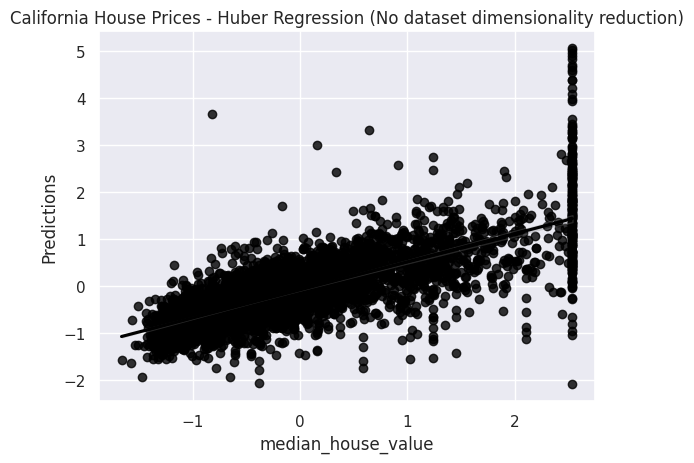

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

y_test_and_pred = pd.concat([y_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis = 1)

sns.regplot(
    data=y_test_and_pred,
    x = 'median_house_value',
    y = 'Predictions',
    color="#000000"
).set_title("California House Prices - Huber Regression (No dataset dimensionality reduction)")

In [23]:
# t-SNE

from sklearn.manifold import TSNE

chp_tsne = TSNE(n_components=2, learning_rate='auto', verbose=1,
                init='random', perplexity=3).fit_transform(X)

[t-SNE] Computing 10 nearest neighbors...
[t-SNE] Indexed 20433 samples in 0.017s...
[t-SNE] Computed neighbors for 20433 samples in 0.208s...
[t-SNE] Computed conditional probabilities for sample 1000 / 20433
[t-SNE] Computed conditional probabilities for sample 2000 / 20433
[t-SNE] Computed conditional probabilities for sample 3000 / 20433
[t-SNE] Computed conditional probabilities for sample 4000 / 20433
[t-SNE] Computed conditional probabilities for sample 5000 / 20433
[t-SNE] Computed conditional probabilities for sample 6000 / 20433
[t-SNE] Computed conditional probabilities for sample 7000 / 20433
[t-SNE] Computed conditional probabilities for sample 8000 / 20433
[t-SNE] Computed conditional probabilities for sample 9000 / 20433
[t-SNE] Computed conditional probabilities for sample 10000 / 20433
[t-SNE] Computed conditional probabilities for sample 11000 / 20433
[t-SNE] Computed conditional probabilities for sample 12000 / 20433
[t-SNE] Computed conditional probabilities for sam

In [24]:
print(chp_tsne.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(
    chp_tsne, y, test_size=0.2, random_state=10)

(20433, 2)
(20433, 1)


In [25]:
huber = HuberRegressor().fit(X_train, y_train.values.ravel())
print("Score: ", round(huber.score(X_train, y_train), 2))

y_pred = pd.DataFrame(huber.predict(X_test), columns = [
    'Predictions'
])

# Calculating mean absolute error, mean squared error
# and root mean squared error
mae = round(mean_absolute_error(y_test, y_pred), 2)
mse = round(mean_squared_error(y_test, y_pred), 2)
rmse = round(np.sqrt(mse), 2)

print("Mean Absolute Error: ", mae)
print("Mean Squared Error: ", mse)
print("Root Mean Squared Error: ", rmse)

Score:  0.14
Mean Absolute Error:  0.69
Mean Squared Error:  0.85
Root Mean Squared Error:  0.92


Text(0.5, 1.0, 'California House Prices - Huber Regression (t-SNE)')

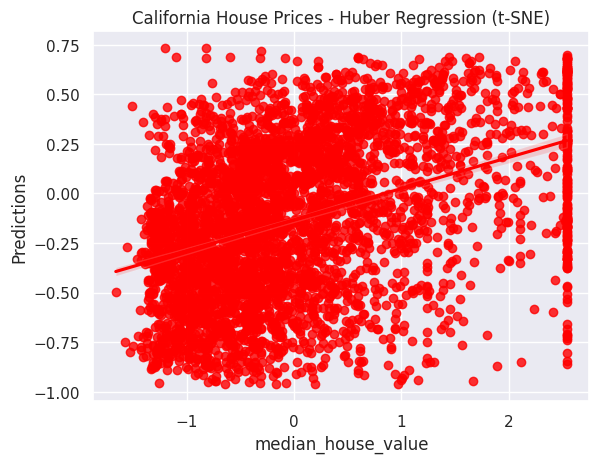

In [26]:
y_test_and_pred = pd.concat([y_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis = 1)

sns.regplot(
    data=y_test_and_pred,
    x = 'median_house_value',
    y = 'Predictions',
    color="#ff0000"
).set_title("California House Prices - Huber Regression (t-SNE)")

In [27]:
import umap

chp_umap = umap.UMAP().fit_transform(X)

In [28]:
print(chp_umap.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(
    chp_umap, y, test_size=0.2, random_state=10)

(20433, 2)
(20433, 1)


In [29]:
huber = HuberRegressor().fit(X_train, y_train.values.ravel())
print("Score: ", round(huber.score(X_train, y_train), 2))

y_pred = pd.DataFrame(huber.predict(X_test), columns = [
    'Predictions'
])

# Calculating mean absolute error, mean squared error
# and root mean squared error
mae = round(mean_absolute_error(y_test, y_pred), 2)
mse = round(mean_squared_error(y_test, y_pred), 2)
rmse = round(np.sqrt(mse), 2)

print("Mean Absolute Error: ", mae)
print("Mean Squared Error: ", mse)
print("Root Mean Squared Error: ", rmse)

Score:  0.06
Mean Absolute Error:  0.73
Mean Squared Error:  0.93
Root Mean Squared Error:  0.96


Text(0.5, 1.0, 'California House Prices - Huber Regression (t-SNE)')

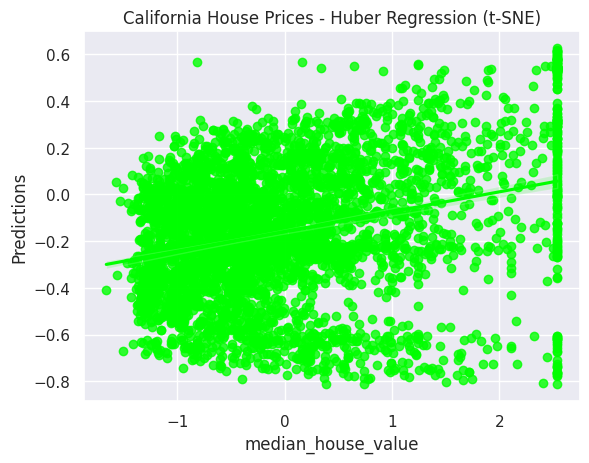

In [30]:
y_test_and_pred = pd.concat([y_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis = 1)

sns.regplot(
    data=y_test_and_pred,
    x = 'median_house_value',
    y = 'Predictions',
    color="#00ff00"
).set_title("California House Prices - Huber Regression (t-SNE)")

In [31]:
import phate

chp_phate = phate.PHATE().fit_transform(X)

Calculating PHATE...
  Running PHATE on 20433 observations and 6 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 1.00 seconds.
    Calculating affinities...
    Calculated affinities in 0.08 seconds.
  Calculated graph and diffusion operator in 1.09 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 1.29 seconds.
    Calculating KMeans...
    Calculated KMeans in 9.27 seconds.
  Calculated landmark operator in 11.25 seconds.
  Calculating optimal t...
    Automatically selected t = 31
  Calculated optimal t in 2.49 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 1.20 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 3.76 seconds.
Calculated PHATE in 19.80 seconds.


In [32]:
print(chp_phate.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(
    chp_phate, y, test_size=0.2, random_state=10)

(20433, 2)
(20433, 1)


In [33]:
huber = HuberRegressor().fit(X_train, y_train.values.ravel())
print("Score: ", round(huber.score(X_train, y_train), 2))

y_pred = pd.DataFrame(huber.predict(X_test), columns = [
    'Predictions'
])

# Calculating mean absolute error, mean squared error
# and root mean squared error
mae = round(mean_absolute_error(y_test, y_pred), 2)
mse = round(mean_squared_error(y_test, y_pred), 2)
rmse = round(np.sqrt(mse), 2)

print("Mean Absolute Error: ", mae)
print("Mean Squared Error: ", mse)
print("Root Mean Squared Error: ", rmse)

Score:  0.15
Mean Absolute Error:  0.7
Mean Squared Error:  0.84
Root Mean Squared Error:  0.92


Text(0.5, 1.0, 'California House Prices - Huber Regression (t-SNE)')

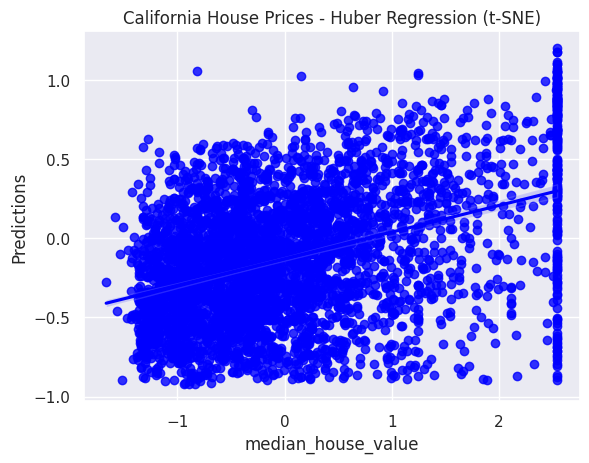

In [34]:
y_test_and_pred = pd.concat([y_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis = 1)

sns.regplot(
    data=y_test_and_pred,
    x = 'median_house_value',
    y = 'Predictions',
    color="#0000ff"
).set_title("California House Prices - Huber Regression (t-SNE)")